In [1]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [2]:
# data path = where we store the data, plots and catalogue
data_path = "./data/lunar/training/"
raw_data_path = data_path + "data/S12_GradeA/"
catalogue_path = data_path + "catalogs/apollo12_catalog_GradeA_final.csv"
print(catalogue_path)

./data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv


In [5]:
df = pd.read_csv(catalogue_path)

In [10]:
filenames = df["filename"]

In [16]:
filenames

0     xa.s12.00.mhz.1970-01-19HR00_evid00002
1     xa.s12.00.mhz.1970-03-25HR00_evid00003
2     xa.s12.00.mhz.1970-03-26HR00_evid00004
3     xa.s12.00.mhz.1970-04-25HR00_evid00006
4     xa.s12.00.mhz.1970-04-26HR00_evid00007
                       ...                  
71    xa.s12.00.mhz.1974-10-14HR00_evid00156
72    xa.s12.00.mhz.1975-04-12HR00_evid00191
73    xa.s12.00.mhz.1975-05-04HR00_evid00192
74    xa.s12.00.mhz.1975-06-24HR00_evid00196
75    xa.s12.00.mhz.1975-06-26HR00_evid00198
Name: filename, Length: 76, dtype: object

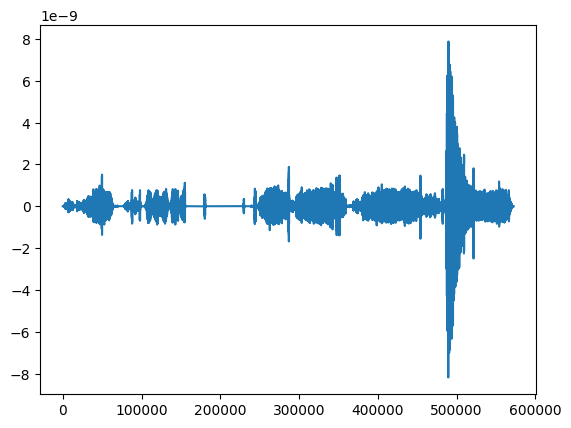

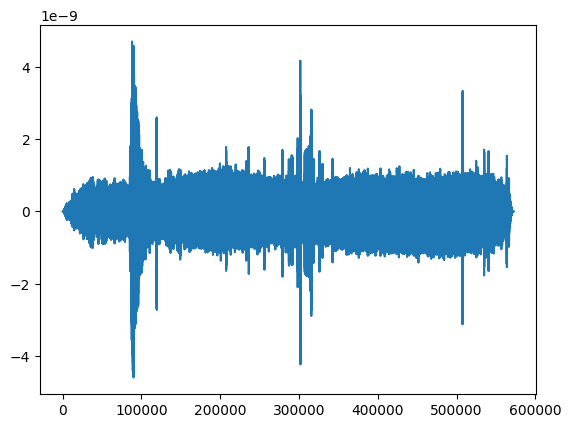

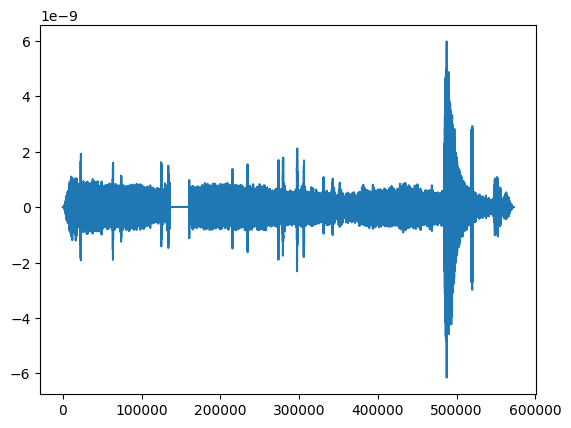

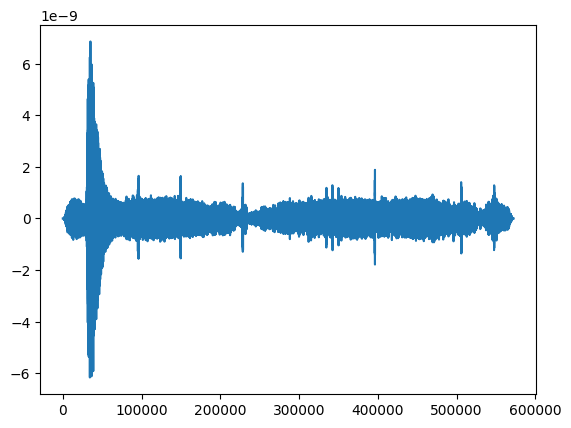

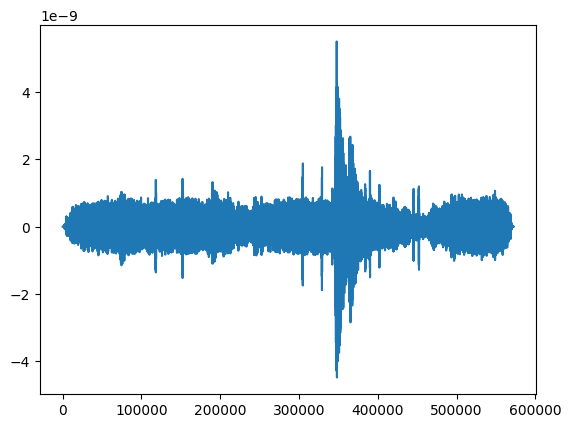

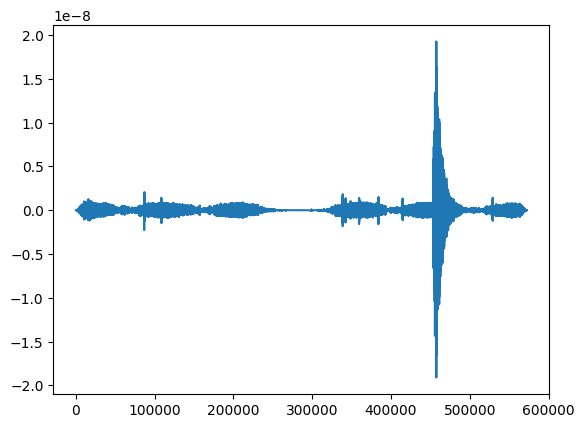

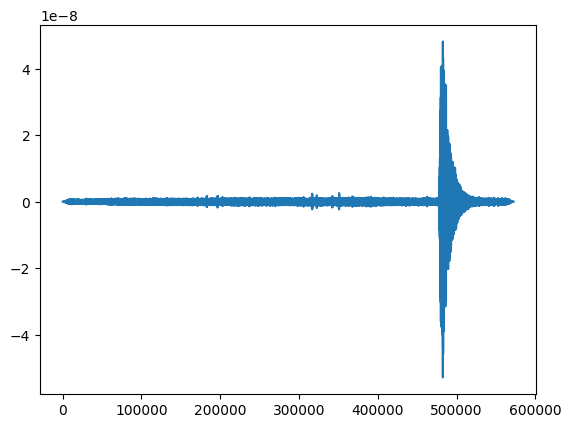

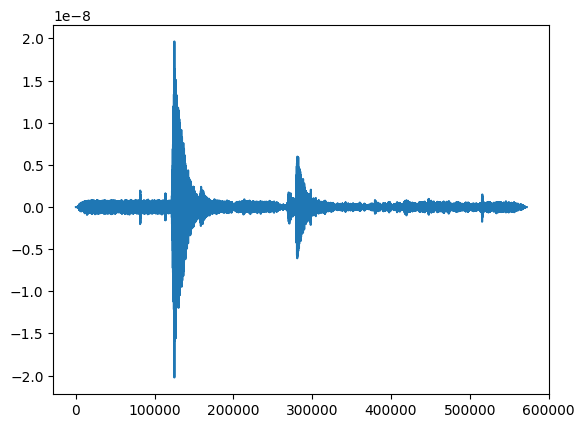

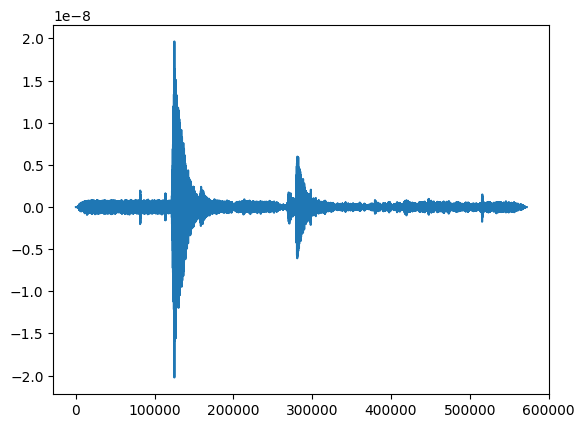

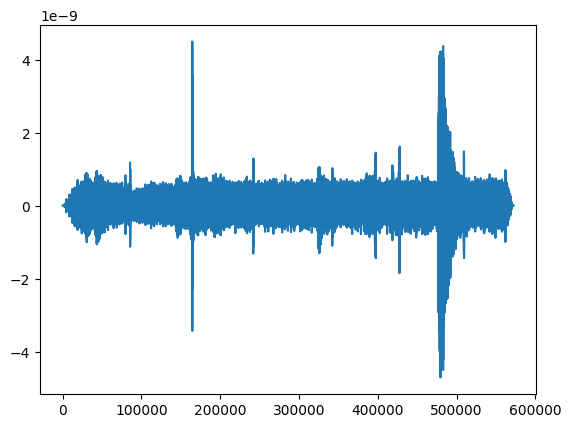

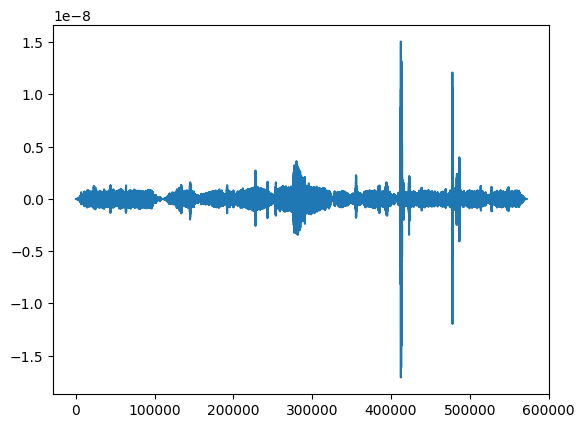

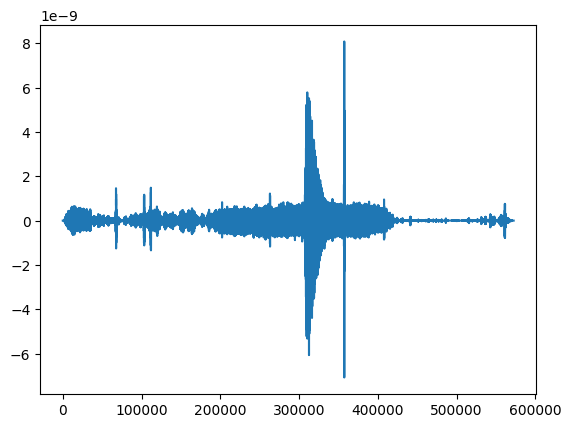

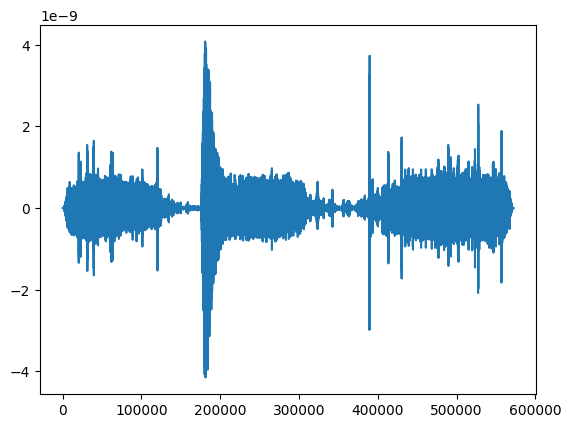

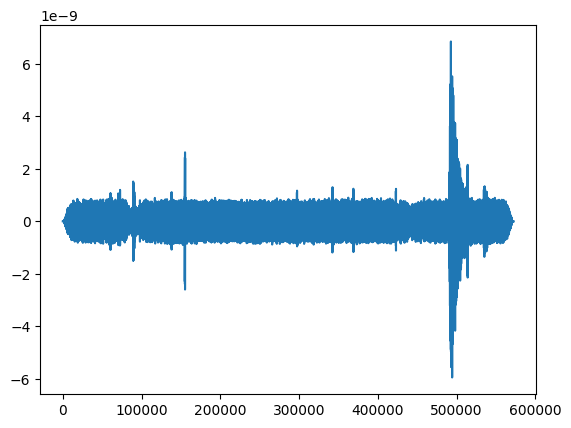

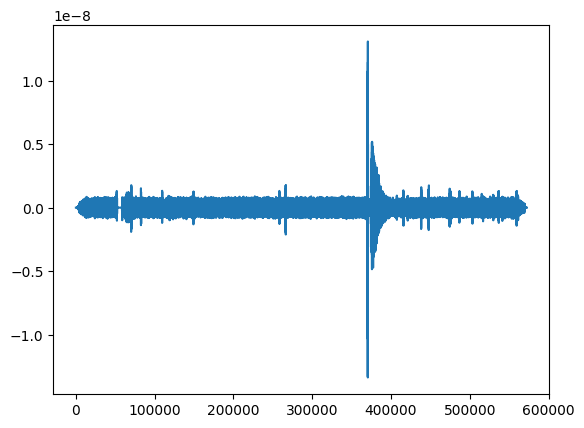

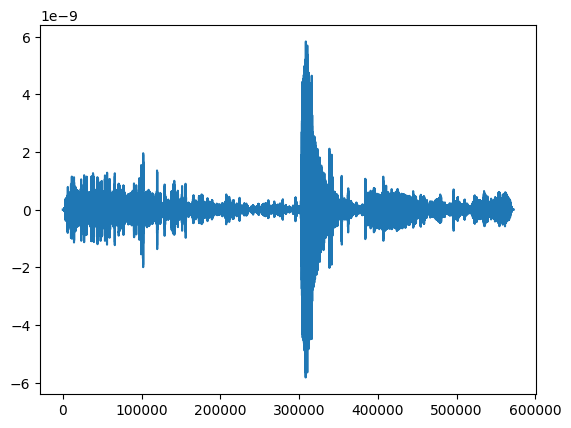

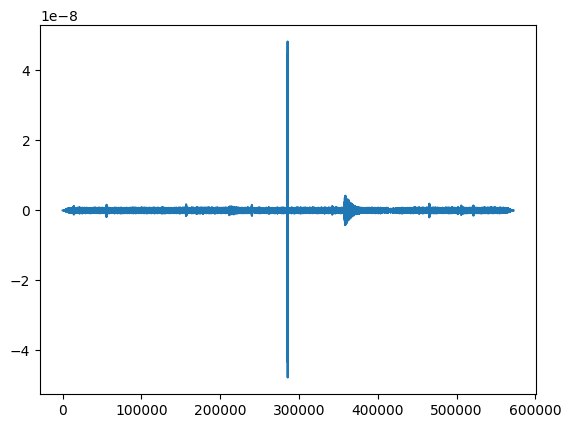

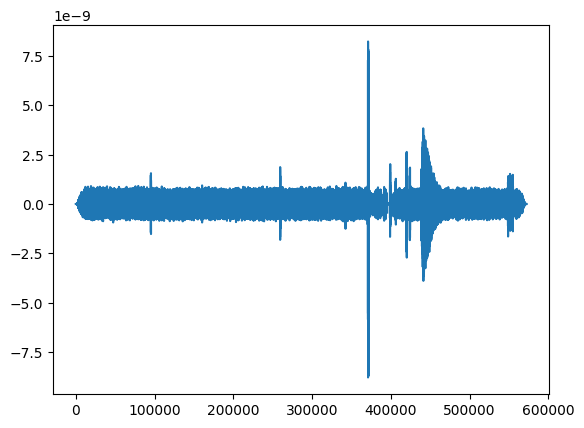

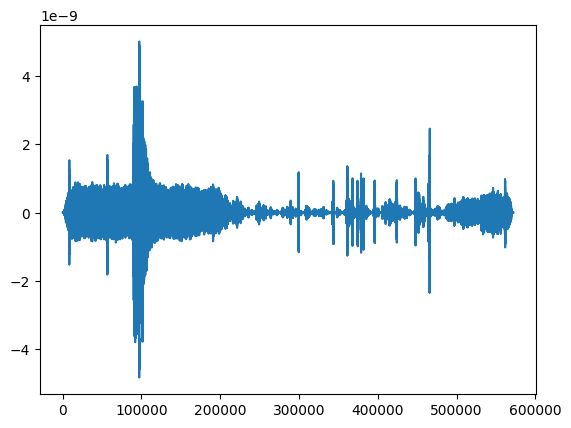

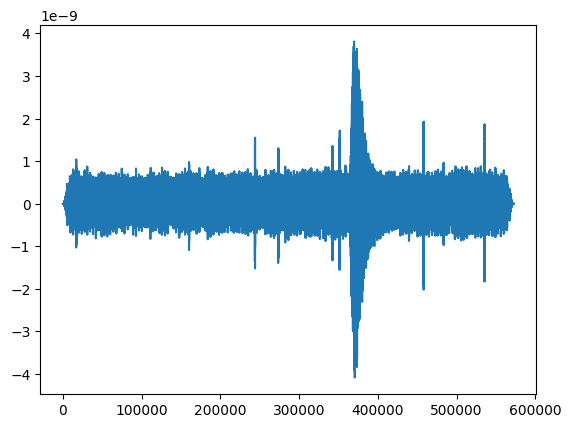

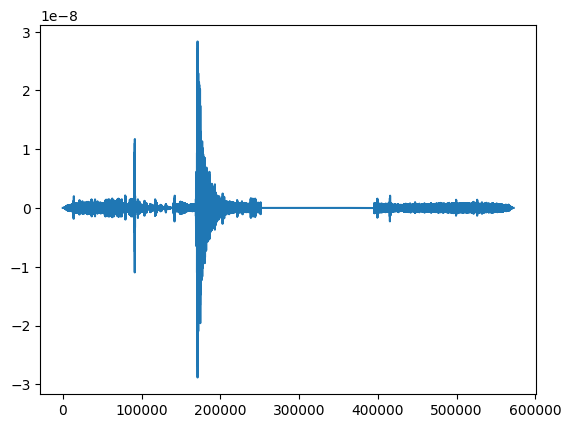

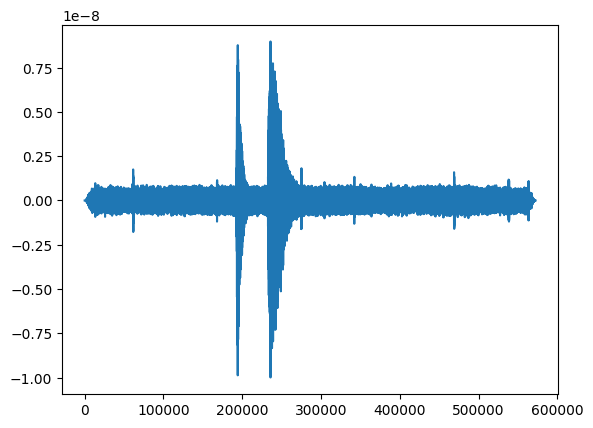

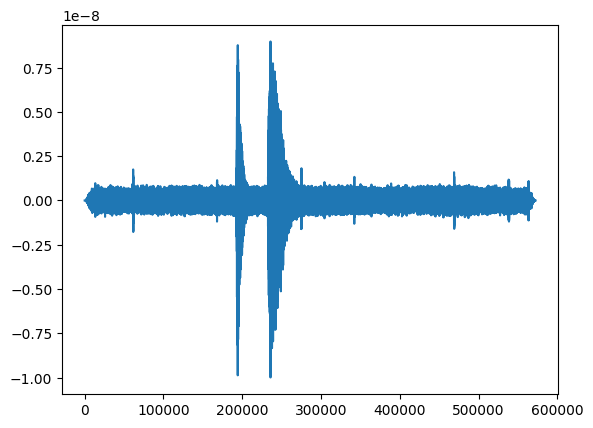

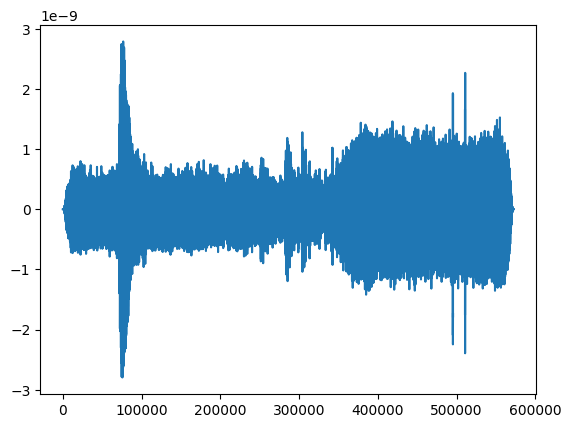

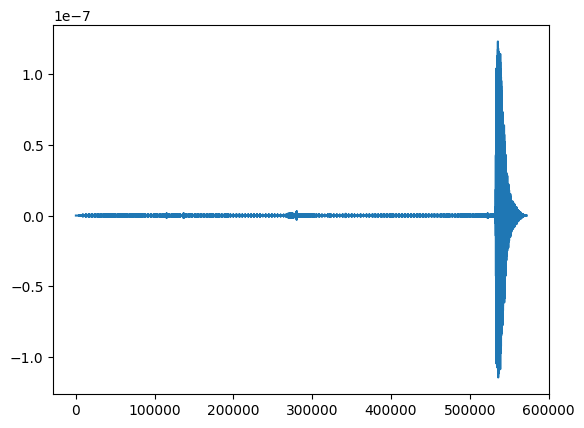

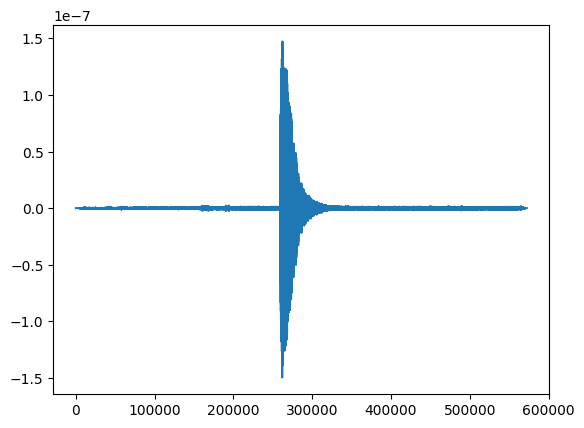

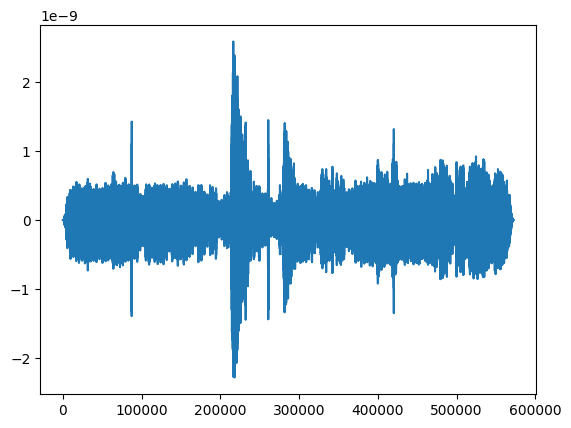

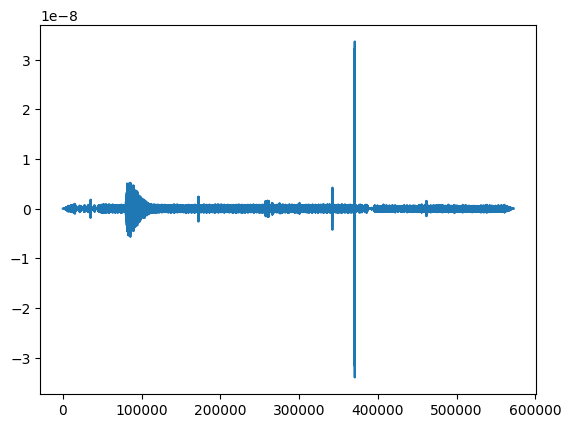

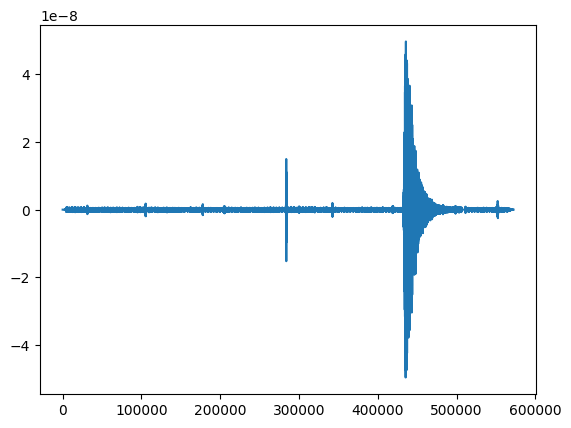

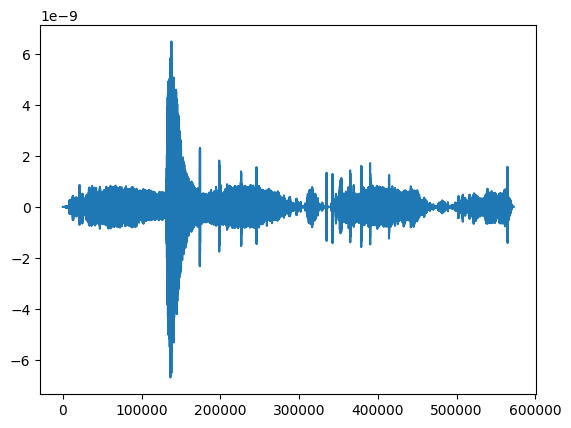

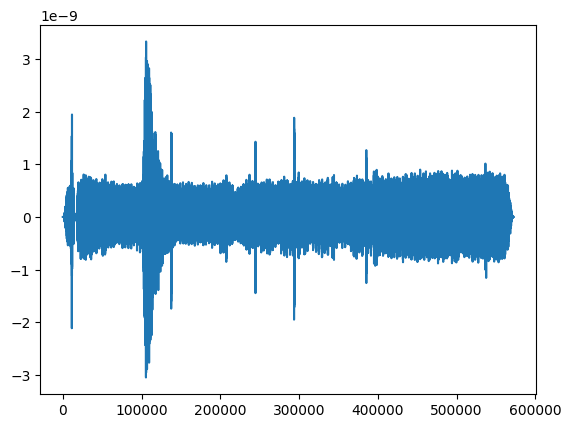

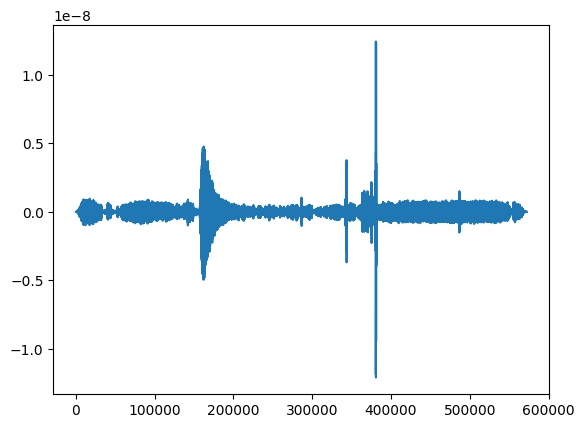

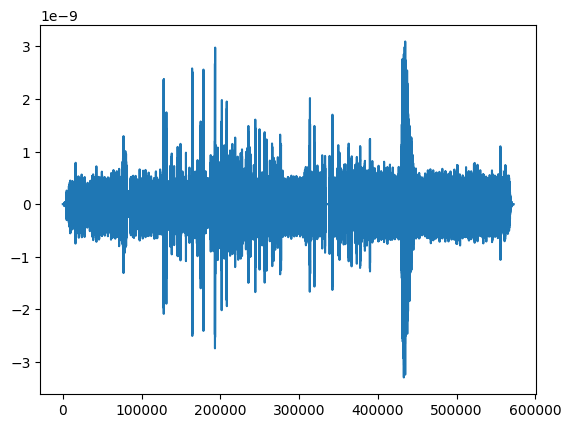

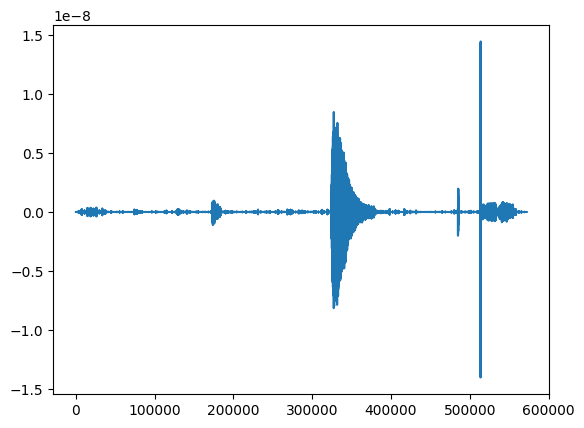

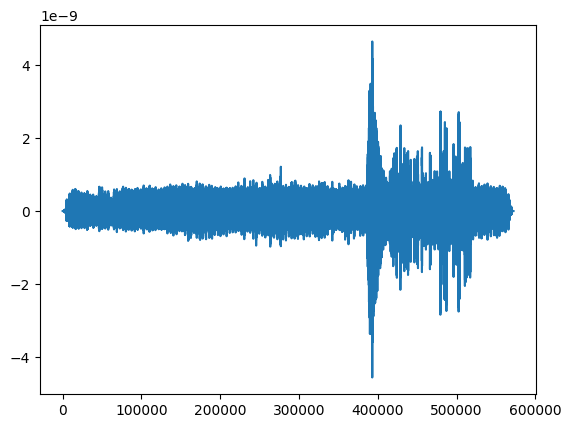

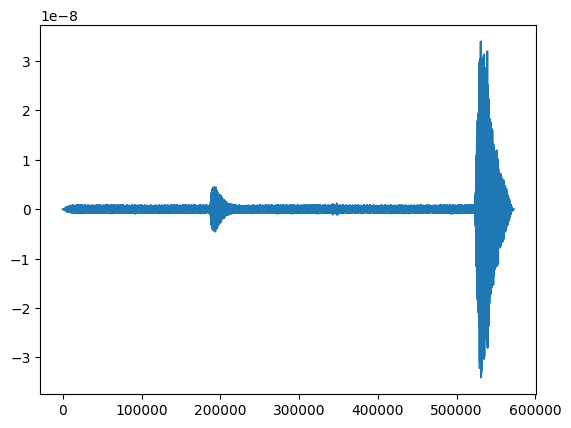

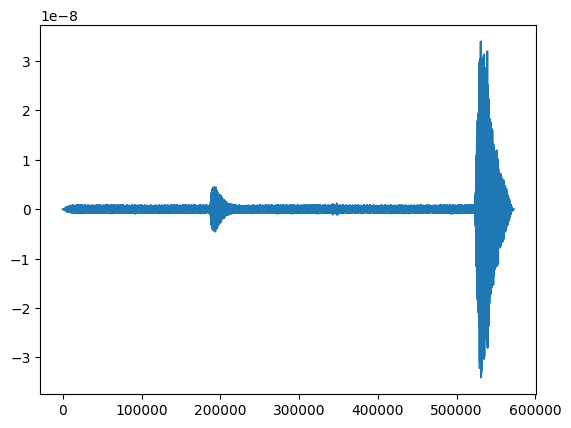

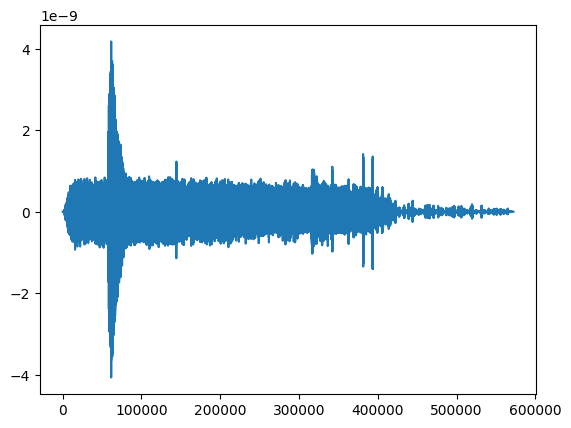

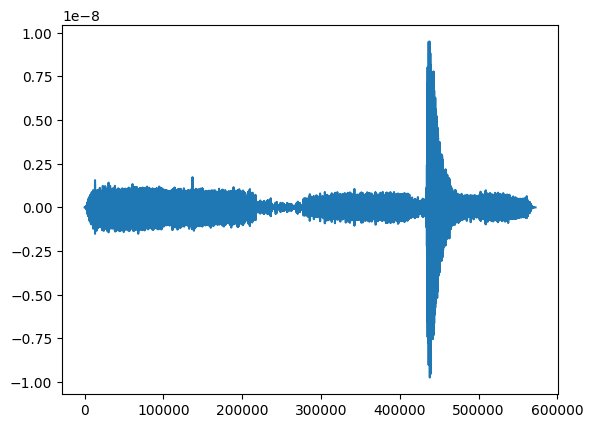

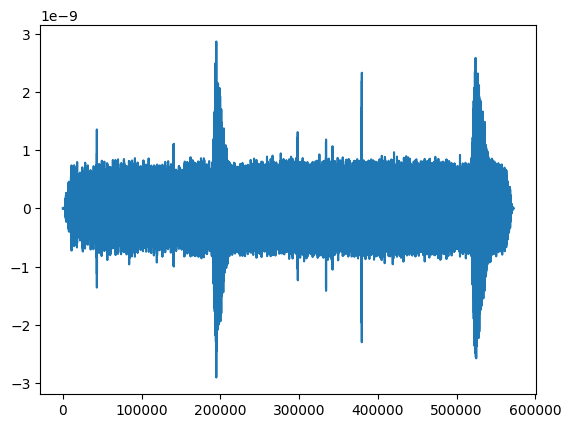

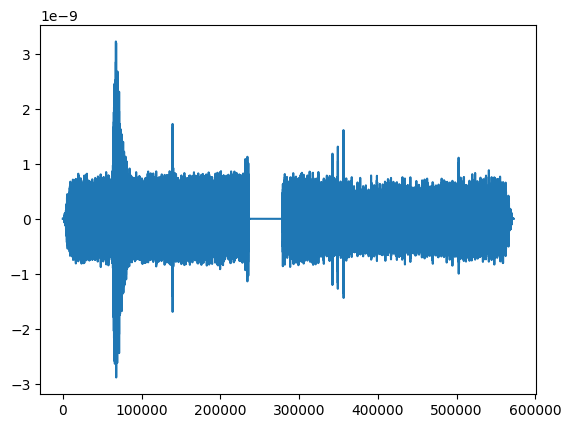

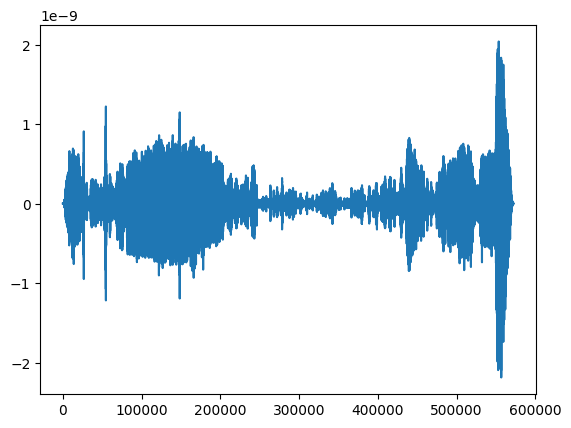

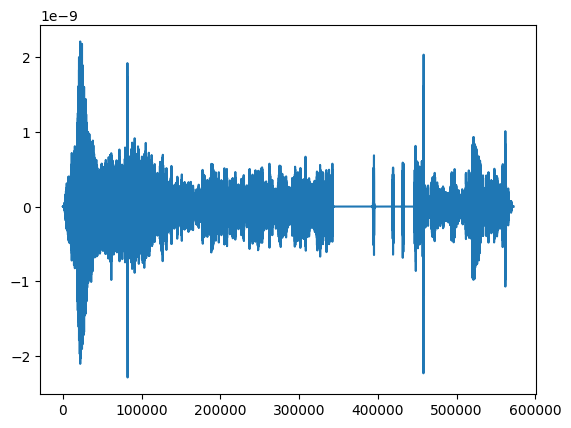

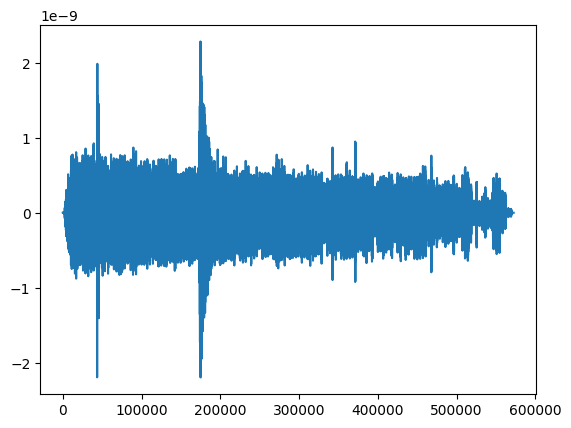

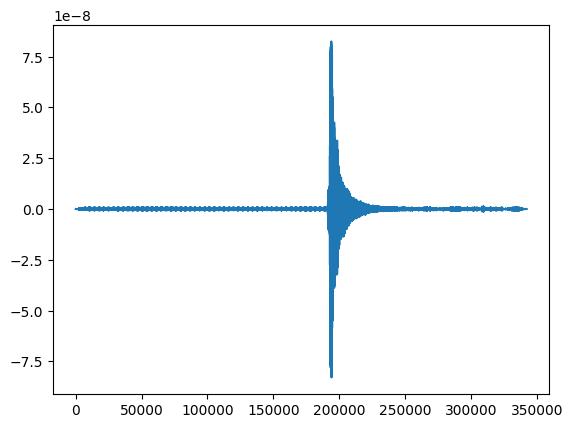

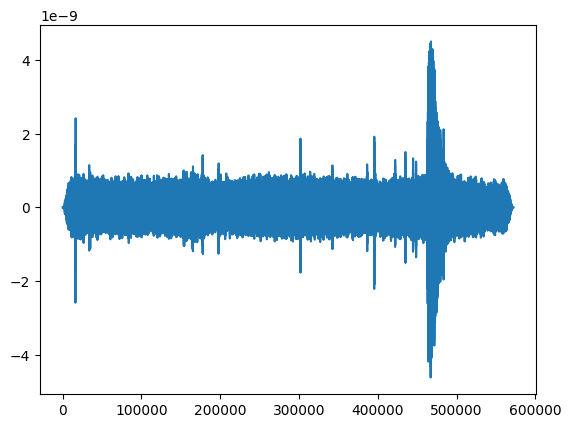

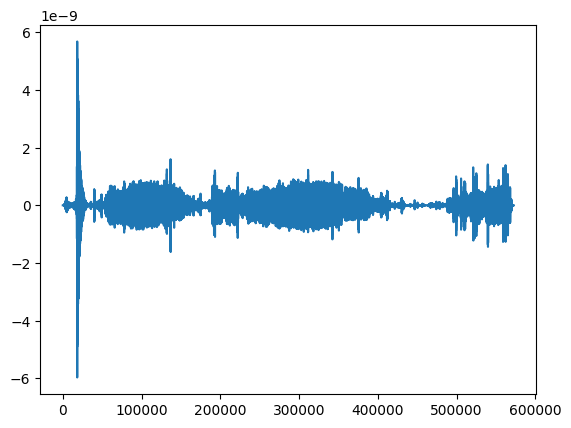

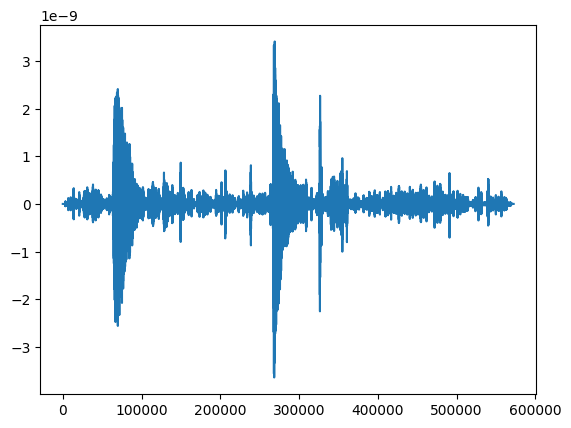

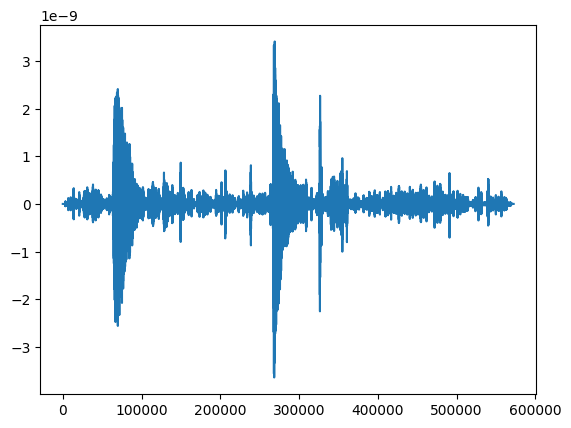

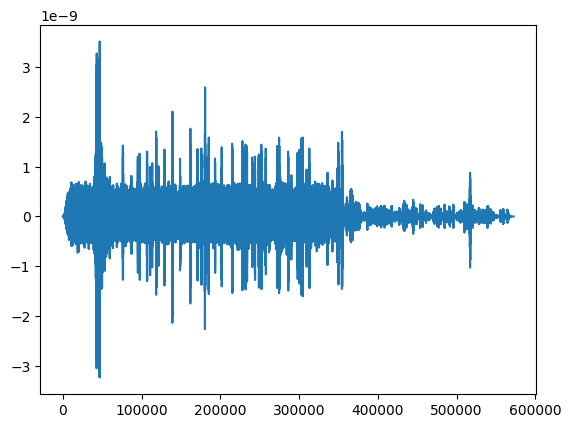

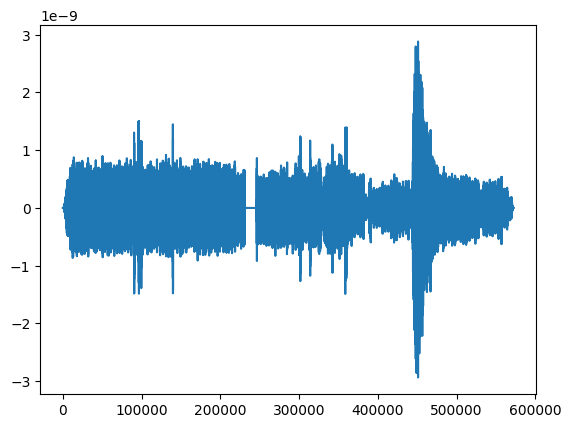

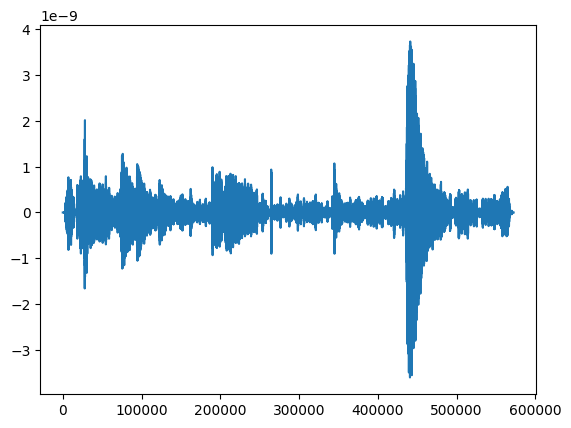

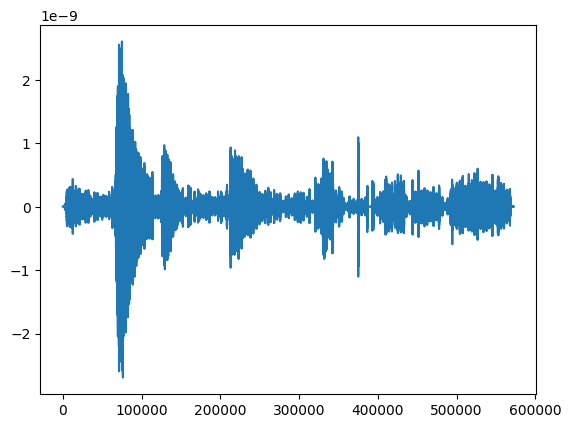

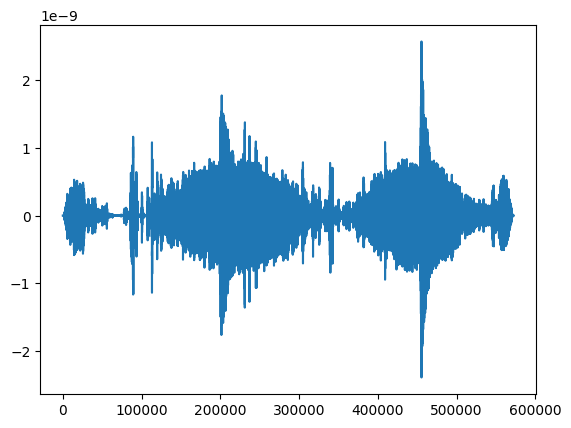

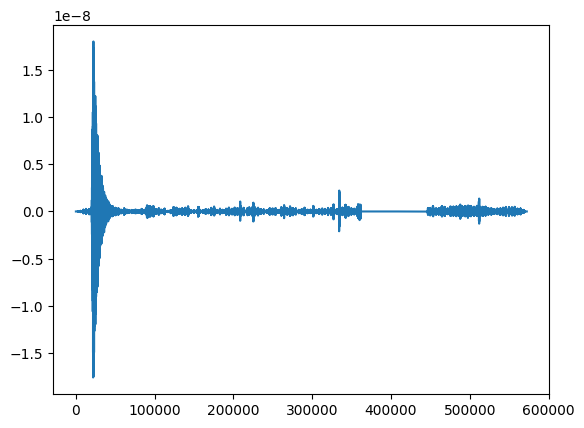

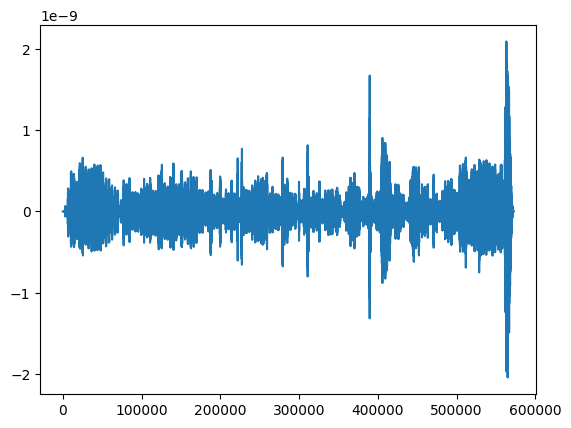

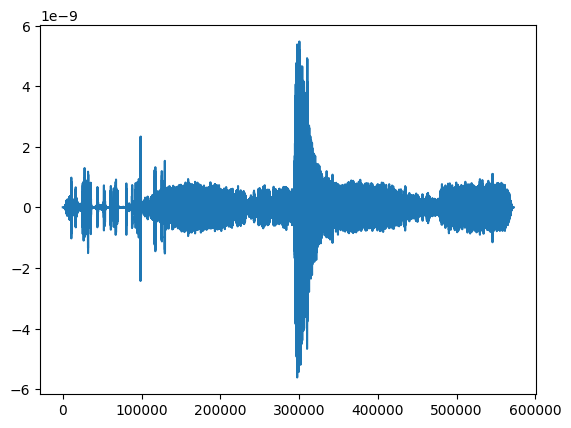

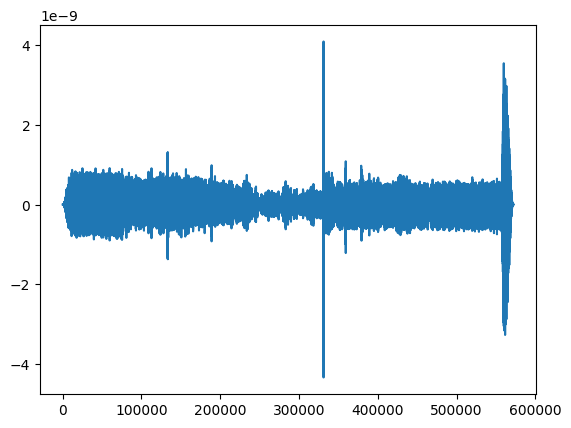

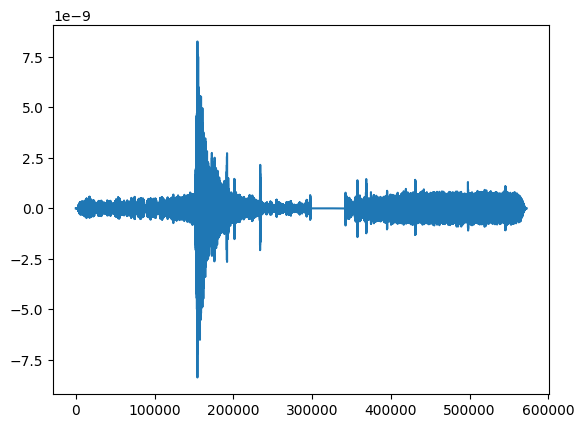

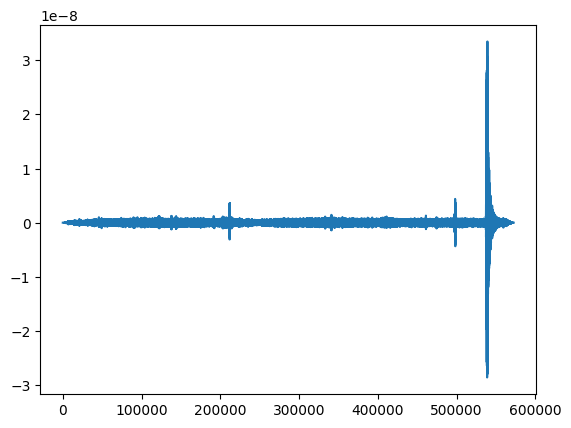

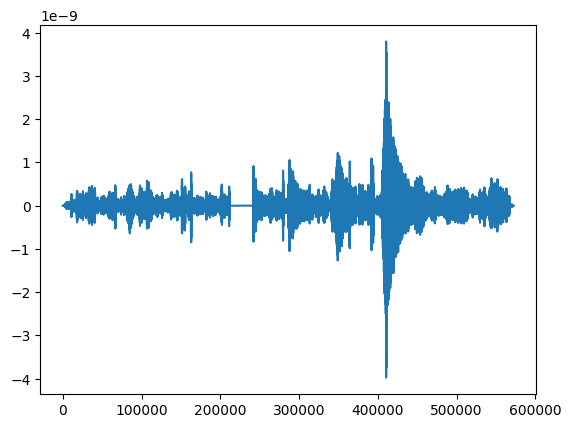

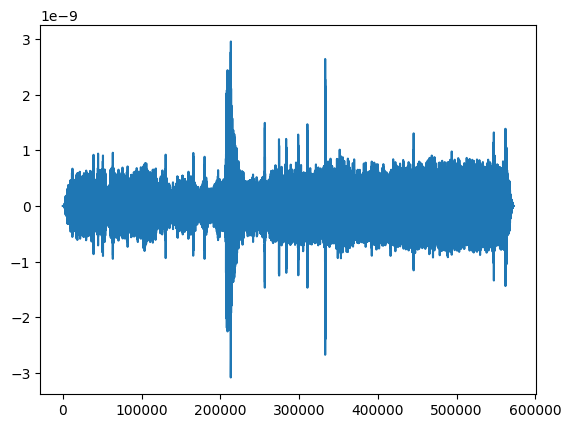

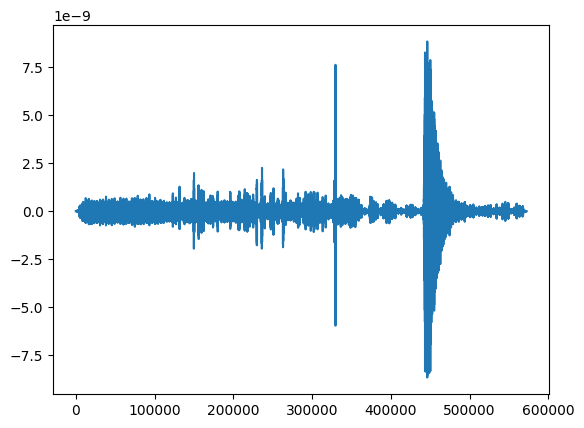

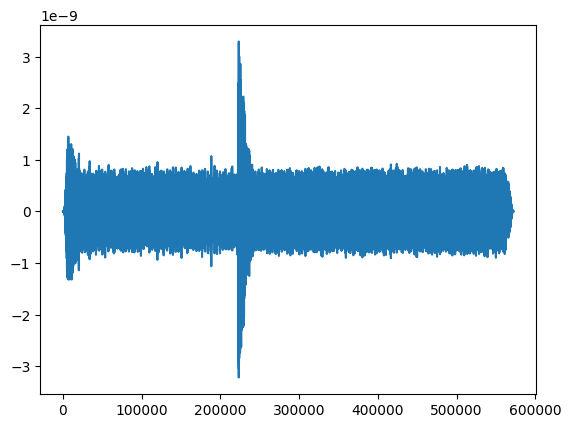

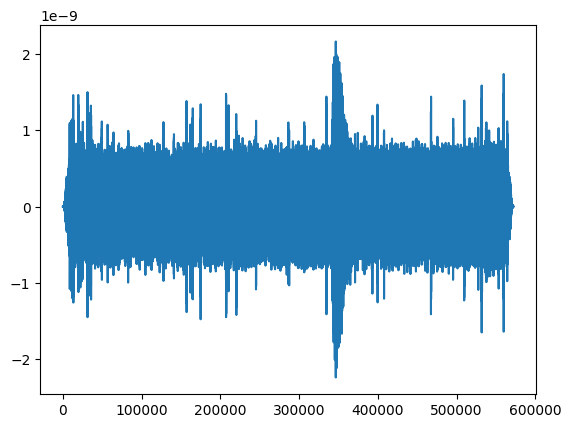

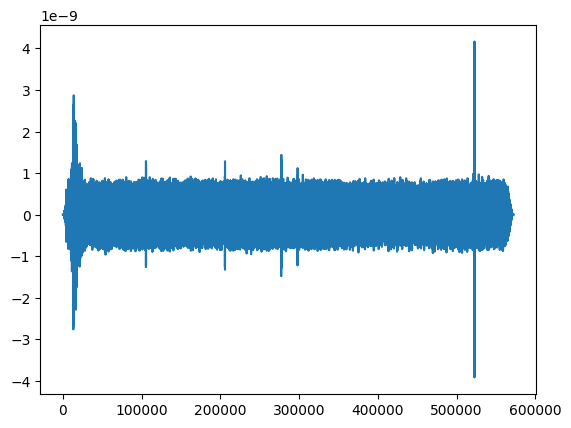

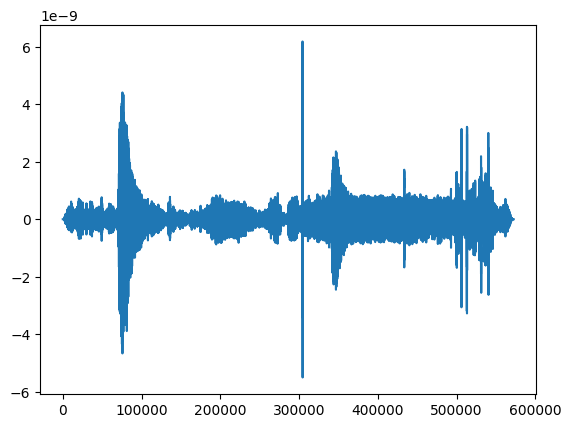

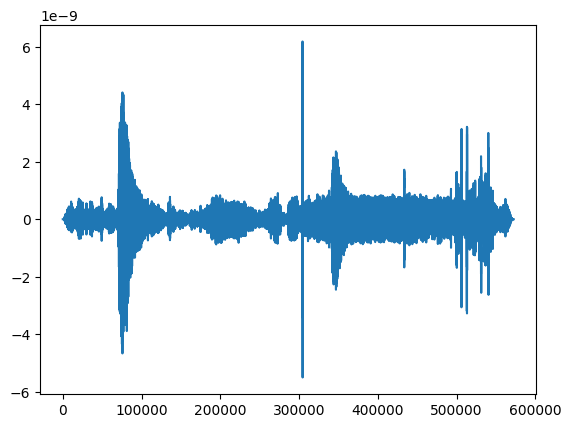

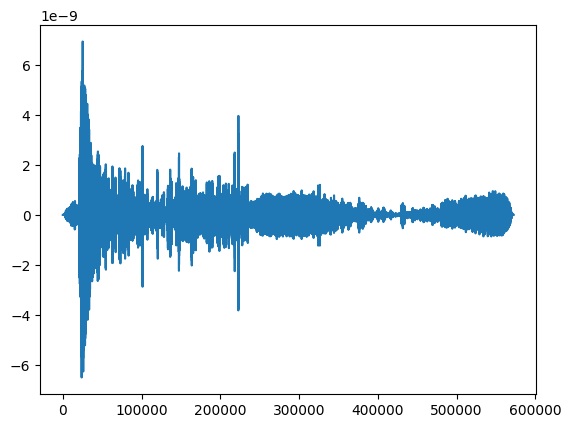

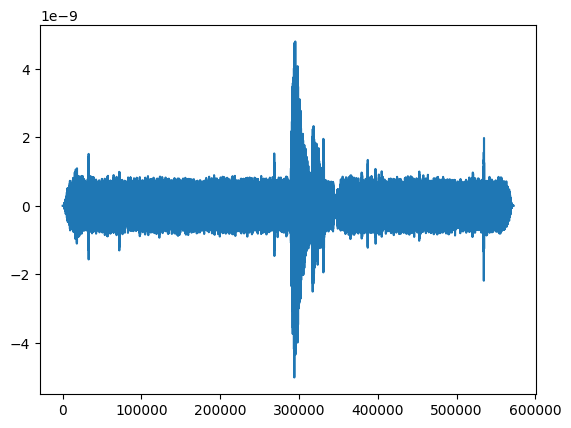

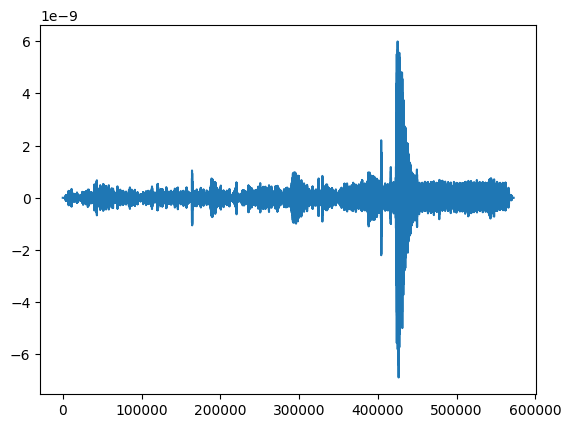

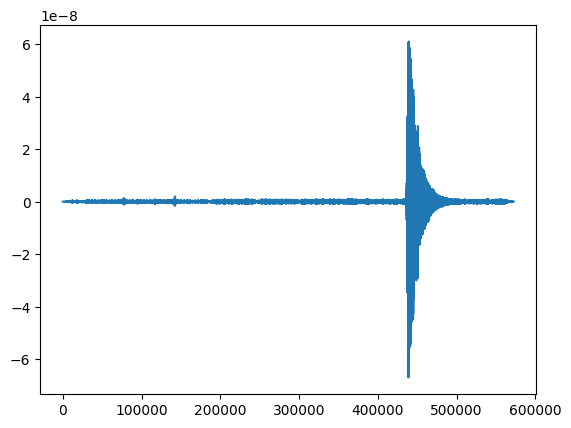

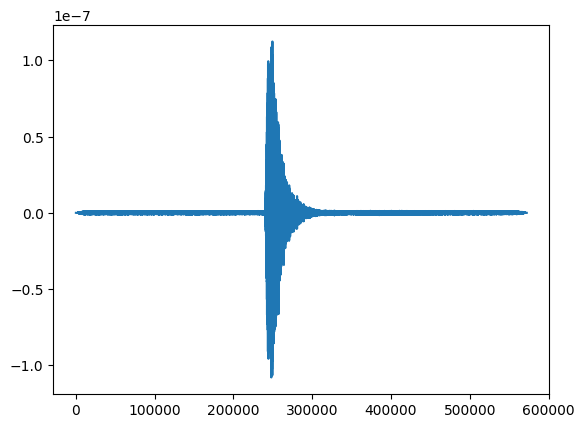

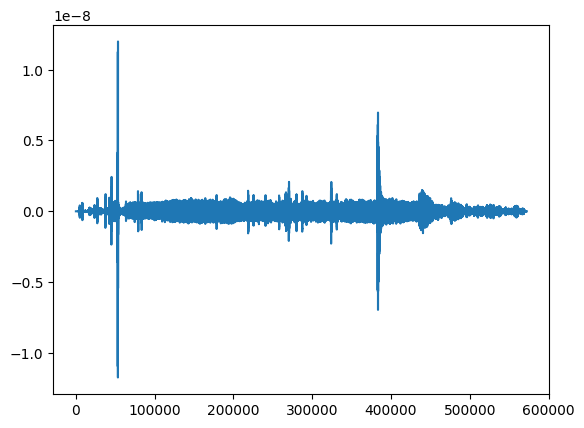

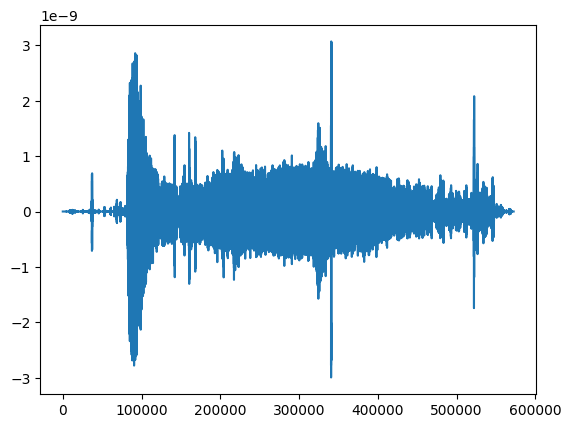

In [30]:
dfs = []
for i in filenames.to_list():
    if os.path.exists(raw_data_path+i+".csv"):
        # dfs.append(pd.read_csv(raw_data_path + i + ".csv"))
        tmp = pd.read_csv(raw_data_path + i + ".csv")
        tmp["velocity(m/s)"].plot()
        plt.show()
        

In [25]:
print(dfs)

[       time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
0          1970-01-19T00:00:00.665000       0.000000  -6.153279e-14
1          1970-01-19T00:00:00.815943       0.150943  -7.701288e-14
2          1970-01-19T00:00:00.966887       0.301887  -8.396187e-14
3          1970-01-19T00:00:01.117830       0.452830  -8.096155e-14
4          1970-01-19T00:00:01.268774       0.603774  -7.097599e-14
...                               ...            ...            ...
572410     1970-01-20T00:00:02.174434   86401.509434  -1.472713e-14
572411     1970-01-20T00:00:02.325377   86401.660377  -1.956104e-14
572412     1970-01-20T00:00:02.476321   86401.811321  -2.240307e-14
572413     1970-01-20T00:00:02.627264   86401.962264  -2.998405e-14
572414     1970-01-20T00:00:02.778208   86402.113208  -4.465515e-14

[572415 rows x 3 columns],        time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
0          1970-03-25T00:00:00.440000       0.000000  -5.481780e-15
1          1970-03-